Network Science with Python and NetworkX Quick Start Guide - Chapter 2

In [1]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({"figure.figsize": (10, 10)})


import random
from numpy import random as nprand
seed = hash("Neumann") % 2**32
nprand.seed(seed)
random.seed(seed)

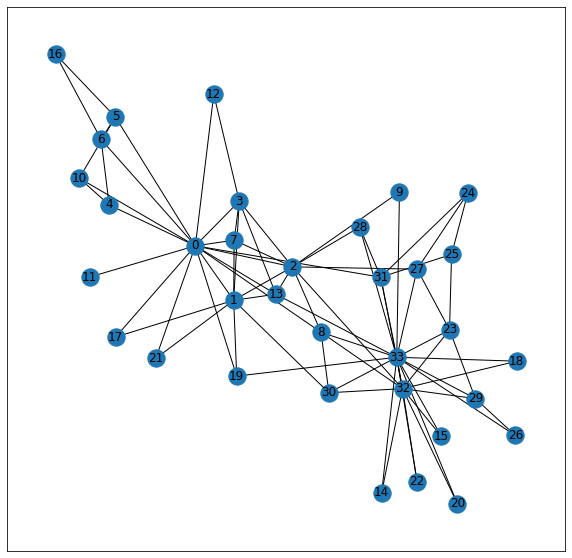

In [2]:
G = nx.karate_club_graph() # The Karate Club is a social network of 34 members. Friendships are represented as edges.
karate_pos = nx.spring_layout(G, k=0.3)
nx.draw_networkx(G, karate_pos)

In [3]:
list(G.nodes)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33]

In [4]:
list(G.edges)

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 17),
 (0, 19),
 (0, 21),
 (0, 31),
 (1, 2),
 (1, 3),
 (1, 7),
 (1, 13),
 (1, 17),
 (1, 19),
 (1, 21),
 (1, 30),
 (2, 3),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 13),
 (2, 27),
 (2, 28),
 (2, 32),
 (3, 7),
 (3, 12),
 (3, 13),
 (4, 6),
 (4, 10),
 (5, 6),
 (5, 10),
 (5, 16),
 (6, 16),
 (8, 30),
 (8, 32),
 (8, 33),
 (9, 33),
 (13, 33),
 (14, 32),
 (14, 33),
 (15, 32),
 (15, 33),
 (18, 32),
 (18, 33),
 (19, 33),
 (20, 32),
 (20, 33),
 (22, 32),
 (22, 33),
 (23, 25),
 (23, 27),
 (23, 29),
 (23, 32),
 (23, 33),
 (24, 25),
 (24, 27),
 (24, 31),
 (25, 31),
 (26, 29),
 (26, 33),
 (27, 33),
 (28, 31),
 (28, 33),
 (29, 32),
 (29, 33),
 (30, 32),
 (30, 33),
 (31, 32),
 (31, 33),
 (32, 33)]

In [5]:
mr_hi = 0
mr_hi in G

True

In [6]:
G.has_node(mr_hi)

True

In [7]:
wild_goose = 1337
wild_goose in G

False

In [8]:
G.has_node(wild_goose)

False

In [9]:
list(G.neighbors(mr_hi))

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31]

In [10]:
member_id = 1
(member_id, mr_hi) in G.edges

True

In [11]:
G.has_edge(mr_hi, member_id)

True

In [12]:
johan_a = 33 # The President of the karate club is Johan A (id=33)
(johan_a, mr_hi) in G.edges # Checks if Johan A is connected to Mr. Hi

False

In [13]:
member_club = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1] #  The club splits up int tow groups. The first group (0) is the club president and the second group (1) is the rest of the members.
for node_id in G.nodes:
    G.nodes[node_id]['club'] = member_club[node_id]
G.add_node(11, club=0) # Attributes can also be added by giving the attribute as a keyword argument.

In [14]:
G.nodes[mr_hi]

{'club': 0}

In [15]:
G.nodes[johan_a]

{'club': 1}

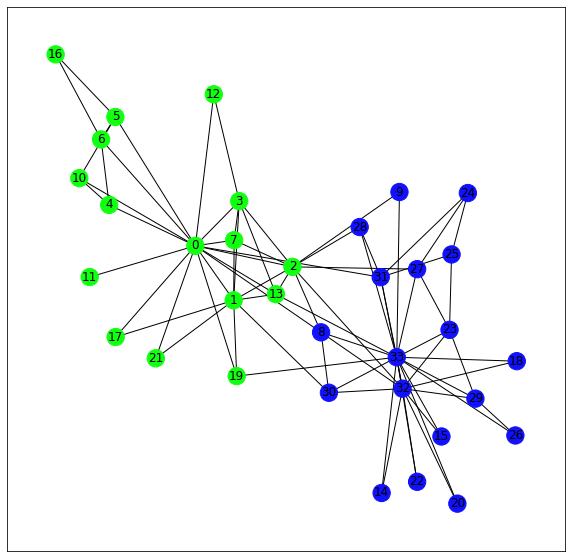

In [16]:
node_colors = ["#11FF11" if G.nodes[node_id]['club'] == 0 else "#1111FF" for node_id in G.nodes]
nx.draw_networkx(G, karate_pos, node_color=node_colors)

In [17]:
for v, w in G.edges:
    if G.nodes[v]["club"] == G.nodes[w]["club"]:
        G.edges[v, w]["internal"] = True
    else:
        G.edges[v, w]["internal"] = False

In [18]:
internal = [e for e in G.edges if G.edges[e]["internal"]]
external = [e for e in G.edges if ~G.edges[e]["internal"]]

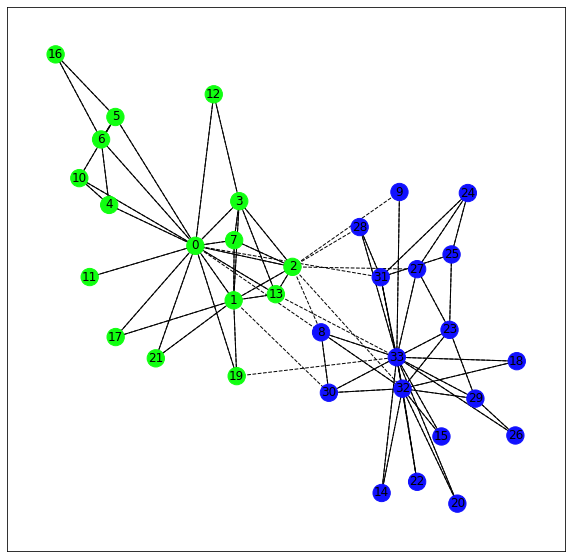

In [19]:
nx.draw_networkx_nodes(G, karate_pos, node_color=node_colors)
nx.draw_networkx_labels(G, karate_pos)
nx.draw_networkx_edges(G, karate_pos, edgelist=internal)
nx.draw_networkx_edges(G, karate_pos, edgelist=external, style="dashed")

In [20]:
def tie_strength(G, v, w):
    v_neighbors = set(G.neighbors(v))
    w_neighbors = set(G.neighbors(w))
    return 1 + len(v_neighbors & w_neighbors)

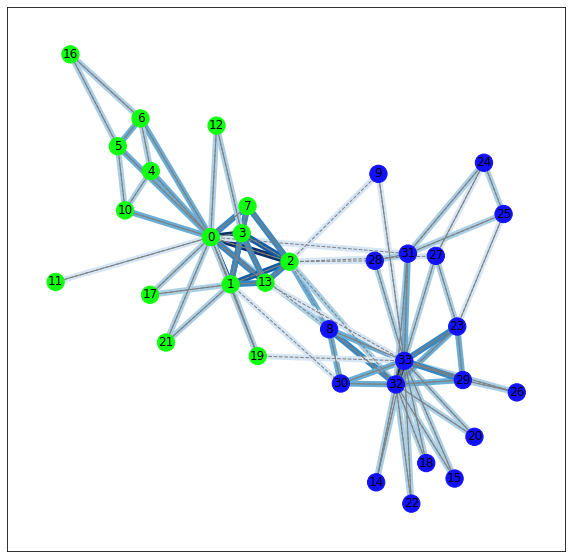

In [21]:
for e in G.edges:
    G.edges[e]["weight"] = tie_strength(G, *e)
edge_weights = [G.edges[e]["weight"] for e in G.edges]
weighted_pos = nx.spring_layout(G, pos=karate_pos, k=0.3, weight="weight")
nx.draw_networkx(G, weighted_pos, width=6, node_color=node_colors, edge_color=edge_weights, edge_cmap=plt.cm.Blues, edge_vmin=0, edge_vmax=6)
nx.draw_networkx_edges(G, weighted_pos, edgelist=internal, edge_color="gray")
nx.draw_networkx_edges(G, weighted_pos, edgelist=external, edge_color="gray", style="dashed")